In [1]:
#Importing important libraries----------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("Fish_dataset.csv")
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
#to check if there is any null values.
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
data['Mean_Length'] = data[['Length1','Length2','Length3']].mean(axis=1)
data

,Species,Weight,Length1,Length2,Length3,Height,Width,Mean_Length
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,26.200000
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,27.166667
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,27.166667
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,29.600000
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,29.833333
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,12.366667
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,12.533333
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,12.966667
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,14.233333


In [7]:
data.drop(['Length1','Length2','Length3'],axis=1,inplace=True)
data.head(4)

,Species,Weight,Height,Width,Mean_Length
0,Bream,242.0,11.5200,4.0200,26.200000
1,Bream,290.0,12.4800,4.3056,27.166667
2,Bream,340.0,12.3778,4.6961,27.166667
3,Bream,363.0,12.7300,4.4555,29.600000


# Q-1 Graph Showing count of individual species

c:\users\saaja.desktop-a37p3d9\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

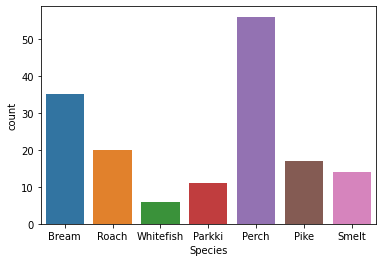

In [8]:
sns.countplot(data.Species)

# Perch have the highest among the species.

# Q-2 Identify Outliers and removeing

In [9]:
data.describe()

,Weight,Height,Width,Mean_Length
count,159.000000,159.000000,159.000000,159.000000
mean,398.326415,8.970994,4.417486,28.629979
std,357.978317,4.286208,1.685804,10.756686
min,0.000000,1.728400,1.047600,8.233333
25%,120.000000,5.944800,3.385650,20.983333
50%,273.000000,7.786000,4.248500,27.266667
75%,650.000000,12.365900,5.584500,36.000000
max,1650.000000,18.957000,8.142000,63.466667


We can clearly see that the 'Weight' column is having outliers and should be removed 

c:\users\saaja.desktop-a37p3d9\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mean_Length'>

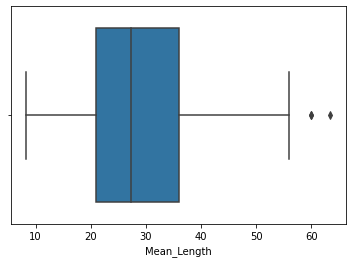

In [10]:
sns.boxplot(data['Mean_Length'])

We can see there are some outliers which should be removed.

c:\users\saaja.desktop-a37p3d9\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

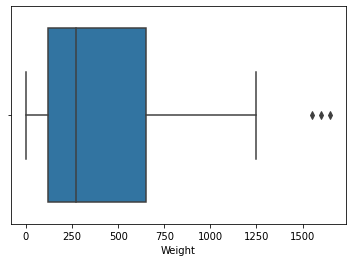

In [11]:
sns.boxplot(data['Weight'])

The Graph represents there are 3 outliers

In [12]:
data[data['Mean_Length']>63]  #the outlier

,Species,Weight,Height,Width,Mean_Length
144,Pike,1650.0,10.812,7.48,63.466667


In [13]:
#Removing the outliers 
data.drop(data[data['Mean_Length']>63].index,inplace=True,axis=0)

In [14]:
#Removing the outliers 
data.drop(data[data['Weight']>1250].index,inplace=True,axis=0)

c:\users\saaja.desktop-a37p3d9\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mean_Length'>

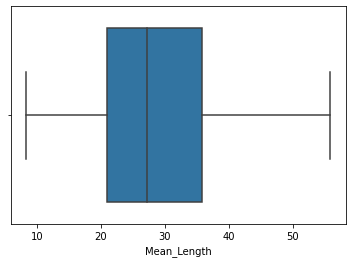

In [15]:
sns.boxplot(data['Mean_Length'])

c:\users\saaja.desktop-a37p3d9\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

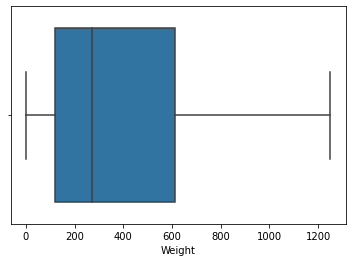

In [16]:
sns.boxplot(data['Weight'])

All the outliers has been removed

<AxesSubplot:>

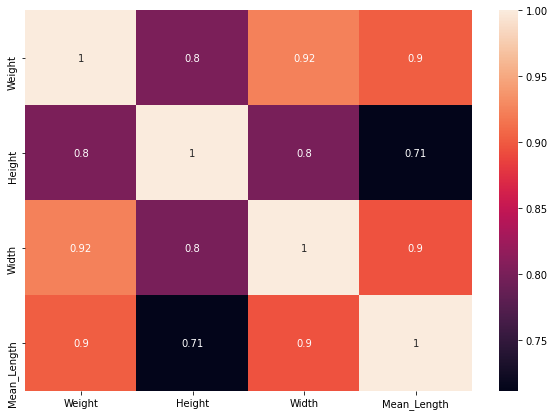

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [18]:
##Encoding the categorical feature ie. 'Species'
##dummy=pd.get_dummies(data,columns=['Species'])
##print(dummy.shape)
##dummy.head()
from sklearn.preprocessing import LabelEncoder
for c in data.columns:
    if data[c].dtype == object and len(data[c].unique())<=50:
        print(f"{c}")
        lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

Species


In [45]:
data.info()   #all are in same data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Species      156 non-null    int32
 1   Weight       156 non-null    int64
 2   Height       156 non-null    int64
 3   Width        156 non-null    int64
 4   Mean_Length  156 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 6.7 KB


In [46]:
data

,Species,Weight,Height,Width,Mean_Length
0,0,46,106,65,58
1,0,53,116,75,64
2,0,57,112,88,64
3,0,59,121,80,70
4,0,61,115,101,72
...,...,...,...,...,...
154,5,10,5,10,9
155,5,11,11,5,10
156,5,10,10,4,11
157,5,12,12,14,13


In [47]:
data.Species.value_counts()

2    56
0    35
4    20
3    14
5    14
1    11
6     6
Name: Species, dtype: int64

In [48]:
X=data.drop(['Weight'],axis=1)
y=data.Weight

In [49]:
X

,Species,Height,Width,Mean_Length
0,0,106,65,58
1,0,116,75,64
2,0,112,88,64
3,0,121,80,70
4,0,115,101,72
...,...,...,...,...
154,5,5,10,9
155,5,11,5,10
156,5,10,4,11
157,5,12,14,13


In [50]:
y

0      46
1      53
2      57
3      59
4      61
       ..
154    10
155    11
156    10
157    12
158    13
Name: Weight, Length: 156, dtype: int64

# Q-3 Building of a regression model

In [51]:
## Splitting the dataset into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Q-3 Linear Regression Equation

We know the equation for the linear regression is y=b0+b1X1+b2X2.......+bnXn

In [54]:
print("Model Intercept",model.intercept_)
print("Model Coefficients",model.coef_)

Model Intercept 2.243154724648768
Model Coefficients [0.18845082 0.1301302  0.25716089 0.29823209]


In [55]:
b0=model.intercept_
b0

2.243154724648768

In [56]:
b1=model.coef_[0]
b1

0.18845082276495034

In [57]:
b2=model.coef_[1]
b2

0.13013019957386773

In [58]:
b3=model.coef_[2]
b3

0.25716089182884727

In [59]:
print("Our Linear Regression is ",'y='+str('%.2f'%b0)+'+'+str('%.2f'%b1)+'*X1'+'+'+str('%.2f'%b2)+'*X2'+'+'+str('%.2f'%b3)+'*X3')

Our Linear Regression is  y=2.24+0.19*X1+0.13*X2+0.26*X3


In [60]:
#getting predictions using our model


In [61]:
y_pred=model.predict(X_test)
y_pred

array([80.38243209, 66.63885156, 20.17920825, 80.68732748, 78.28097426,
       62.59918299, 38.97244386, 54.55625094, 72.96315048, 28.56184786,
       33.70549904, 43.58297202, 56.31148888, 86.80523121, 51.17444099,
        7.42247911, 92.13712563, 87.03443652, 33.26835162, 40.71726972,
        7.60369662, 64.96400074, 79.62614193, 81.23743911, 82.07912366,
        8.88496639, 30.40031913, 18.81125801, 25.88987284, 31.24708761,
       72.8827483 , 75.44744061, 65.46794137, 37.96354828, 75.49399323,
       20.25934206, 46.50045657, 58.04950496, 34.22142514])

In [62]:
dt=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dt.head()

,Actual,Predicted
26,81,80.382432
54,60,66.638852
37,21,20.179208
112,77,80.687327
24,79,78.280974


In [63]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.231106492082019
Mean Squared Error: 30.92857978943395
Root Mean Squared Error: 5.561346940214569


In [64]:
#calculating  R-squared
from sklearn.metrics import r2_score
r_sq = r2_score(y_test,y_pred)
r_sq

0.9546376694157879

# Our linear equations is y=2.24+0.19*X1+0.13*X2+0.26*X3+..........

# Q4. What is the mean score of the model at 95% confidence interval

In [65]:
pip install statsmodels

You should consider upgrading via the 'c:\users\saaja.desktop-a37p3d9\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [66]:
import statsmodels.api as sm
X =  sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1776.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):          8.24e-126
Time:                        10:49:04   Log-Likelihood:                -433.12
No. Observations:                 156   AIC:                             876.2
Df Residuals:                     151   BIC:                             891.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.4189      1.225      1.974      0.050      -0.002       4.840
Species        -0.0156      0.262     -0.060      0.952      -0.533       0.501
Height          0.1257      0.017      7.262      0.000       0.092       0.160
Width           0.2573      0.024     10.921      0.000       0.211       0.304
Mean_Length     0.3018      0.022     13.972      0.000       0.259       0.345
==============================================================================
Omnibus:                      115.675   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1730.097
Skew:                          -2.415   Prob(JB):                         0.00
Kurtosis:                      18.583   Cond. No.                         555.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q-5 Conclusion

c:\users\saaja.desktop-a37p3d9\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

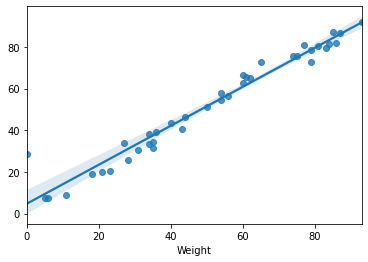

In [67]:
sns.regplot(y_test, y_pred)

The value of R^2 score is very high and there is also strong positive linear relationship between predicted and actual values. 
So we can conclude that the model has done pretty well in predicting the weights of the species